In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30,20]#set the plot size
plt.rc('font', size=15)

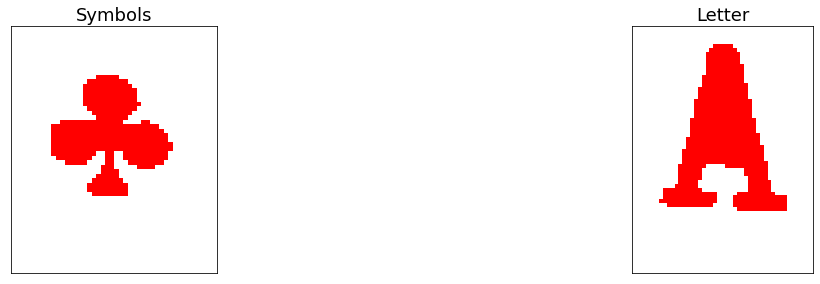

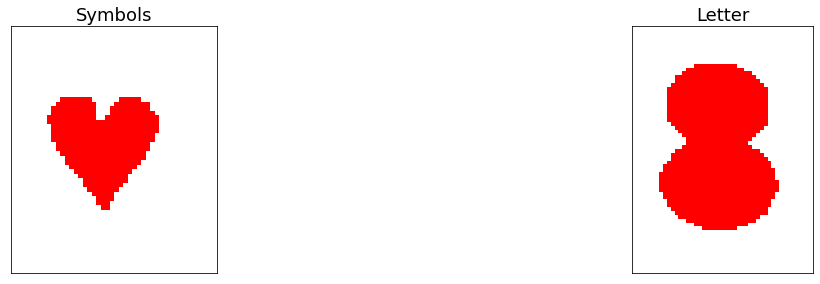

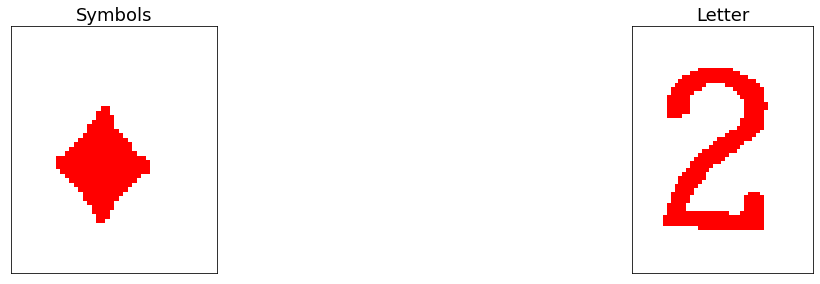

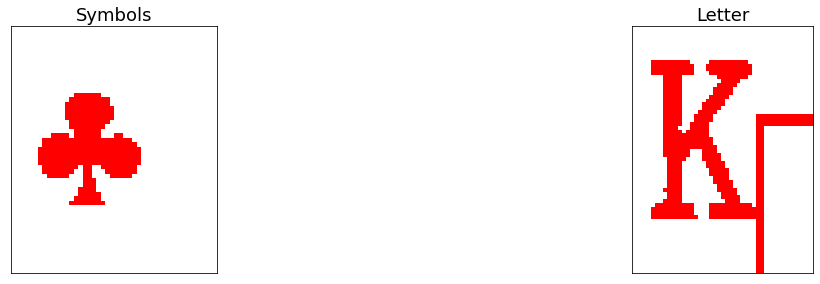

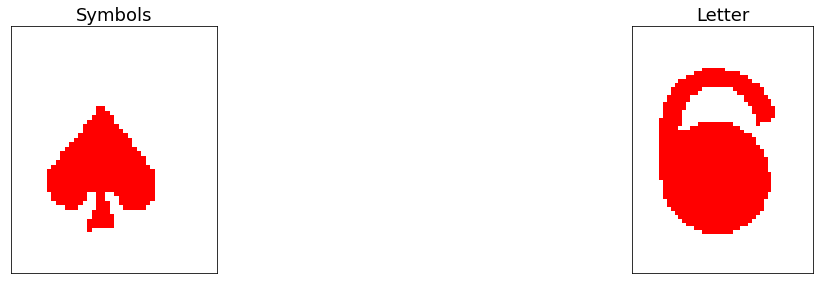

In [2]:
img = cv2.imread("blackcard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
contours,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(contours, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i = 0
width, height = 250, 350
font = cv2.FONT_HERSHEY_COMPLEX

def warpPerspective(contour):
    largestContour = contour
    width, height = 250, 350
    pts2 = np.float32([[0,0],[width,0], [width,height],[0, height]])
    pts1 = np.float32([[0,0],[0,0],[0,0],[0,0]])
    for cnt in largestContour :
        
        approx = cv2.approxPolyDP(largestContour, 0.009 * cv2.arcLength(largestContour, True), True) 
        l = 0
        
        # Used to flatted the array containing 
        # the co-ordinates of the vertices. 
        n = approx.ravel()  
        a = 0
  
        for j in n : 
            if(a % 2 == 0):
                r = 0
                x = n[a] 
                y = n[a + 1] 
                pts1[l][r] = x
                pts1[l][r + 1] = y
                l = l + 1  
            a = a + 1
            
    sorted_pts = np.zeros((4, 2), dtype="float32")
    add = np.sum(pts1, axis=1)
    diff = np.diff(pts1, axis=1)
    
    sorted_pts[0] = pts1[np.argmin(add)]
    sorted_pts[2] = pts1[np.argmax(add)]

    sorted_pts[1] = pts1[np.argmin(diff)]
    sorted_pts[3] = pts1[np.argmax(diff)]
    
    matrix = cv2.getPerspectiveTransform(sorted_pts,pts2)
    imgoutput = cv2.warpPerspective(img,matrix,(width,height))
    getLettersandSymbols(imgoutput)

def getLettersandSymbols(imgoutput):
    ROI = imgoutput
    heightImg,widthImg,channels = ROI.shape
    
    pts2 = np.float32([[0,0],[width,0], [0, height],[width,height]])
    pts1 = np.float32([[0,0],[0,0],[0,0],[0,0]])

    H,W,Channels = ROI.shape

    cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]

    cropped_symbol = ROI[50:int(H * 0.3), 4:int(W * 0.2)]

    G = cv2.cvtColor(cropped_symbol, cv2.COLOR_BGR2GRAY)
    T = 120
    T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
    inverse = cv2.bitwise_not(B)
    sContour,_ = cv2.findContours(inverse, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    sC = sorted(sContour, key=cv2.contourArea, reverse=True)

    cropped = cropped_symbol
    croppedH, croppedW, croppedChannels = cropped.shape 
    img_3 = np.zeros([croppedH,croppedW,3],dtype=np.uint8)
    img_3.fill(255)
    cv2.fillPoly(img_3, pts =[(sC[0])], color=(255,0,0))

    G = cv2.cvtColor(cropped_letter, cv2.COLOR_BGR2GRAY)
    T = 120
    T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
    inverse = cv2.bitwise_not(B)
    sContour,_ = cv2.findContours(inverse, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    sC = sorted(sContour, key=cv2.contourArea, reverse=True)

    cropped = cropped_letter
    croppedH, croppedW, croppedChannels = cropped.shape 
    img_3 = np.zeros([croppedH,croppedW,3],dtype=np.uint8)
    img_3.fill(255)
    cv2.fillPoly(img_3, pts =[(sC[0])], color=(255,0,0))





while i < 5:
    largestContour = C[i]
    warpPerspective(largestContour)
    i = i + 1
    #x,y,w,h = cv2.boundingRect(largestContour)

    #ROI = img[y:y+h,x:x+w]



